## Report 3: Local search

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/3

#### PROBLEM DESCRIPTION:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to compare the paths created by greedy heuristics from the previous assignment with local search solutions. We run each greedy method 200 times - each time we chose the different vertex as the starting node. For the random method, the starting vertex is chosen randomly in every iteration.

In [1]:
from scripts import *

np.random.seed(123)

filenames = {
    letter: f"../data/TSP{letter}.csv" for letter in ('A', 'B', 'C', 'D')
}

## Steepest search, two-nodes exchange, random start

#### PSEUDOCODE:

```
    TODO
```

Best cost: 122918.0
Worst cost: 141478.0
Mean cost after 200 solutions: 132789.765


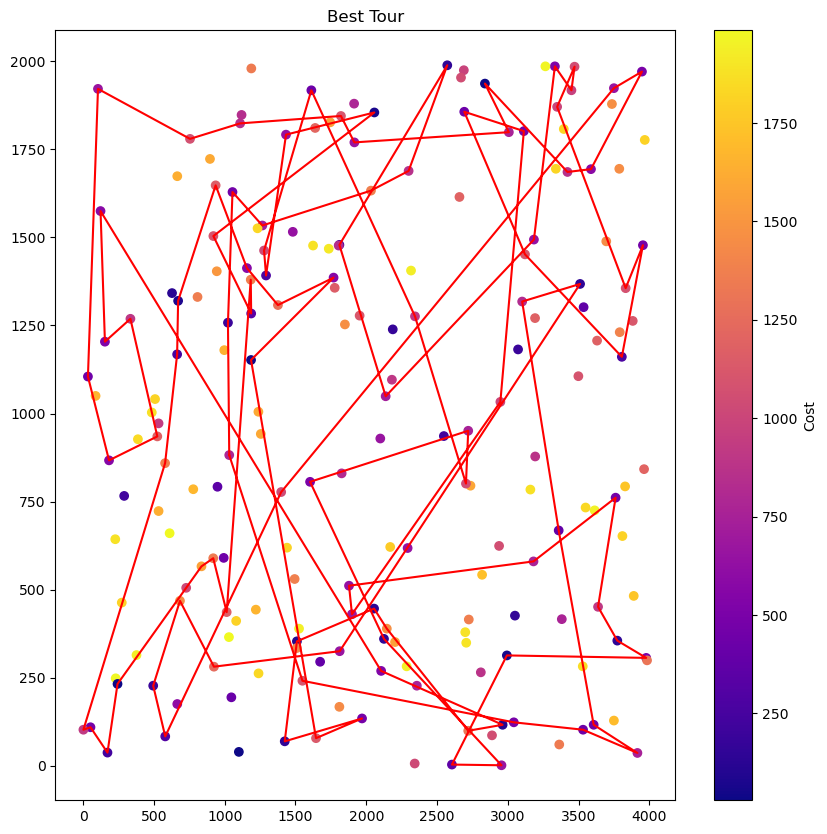

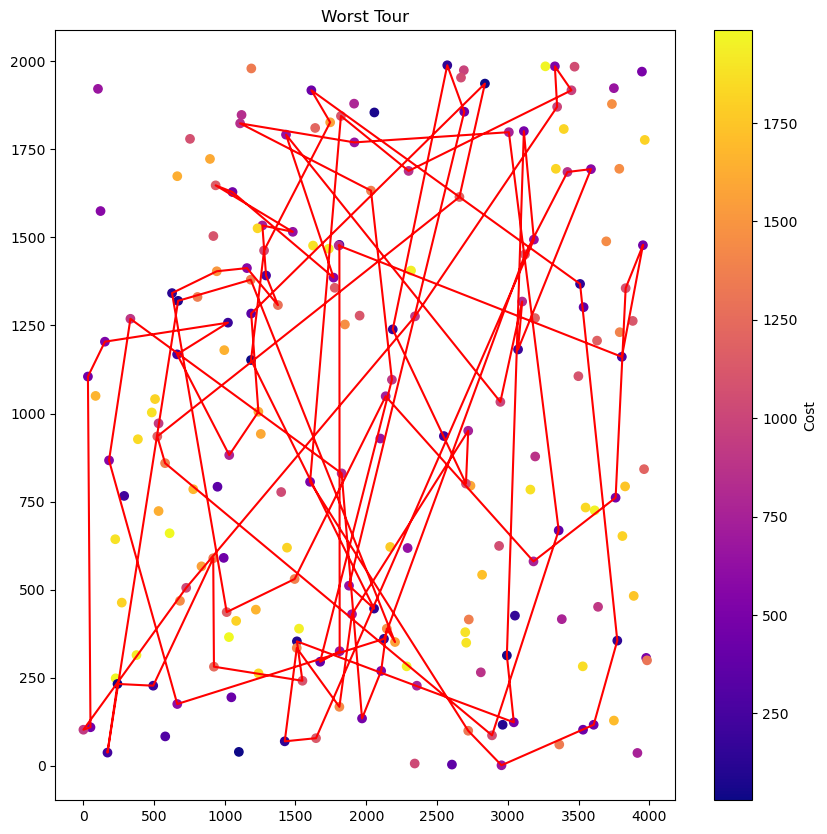

In [2]:
run_steepest_2n_r_experiment(filenames['A'])

In [ ]:
# step_search_2n_r(filenames['B'])

In [ ]:
# step_search_2n_r(filenames['C'])

In [ ]:
# step_search_2n_r(filenames['D'])

## Steepest search, two-nodes exchange, the best greedy construction heuristic

#### PSEUDOCODE:

```
 TODO
```

Best cost: 75628.0
Worst cost: 76575.0
Mean cost after 200 solutions: 76101.5


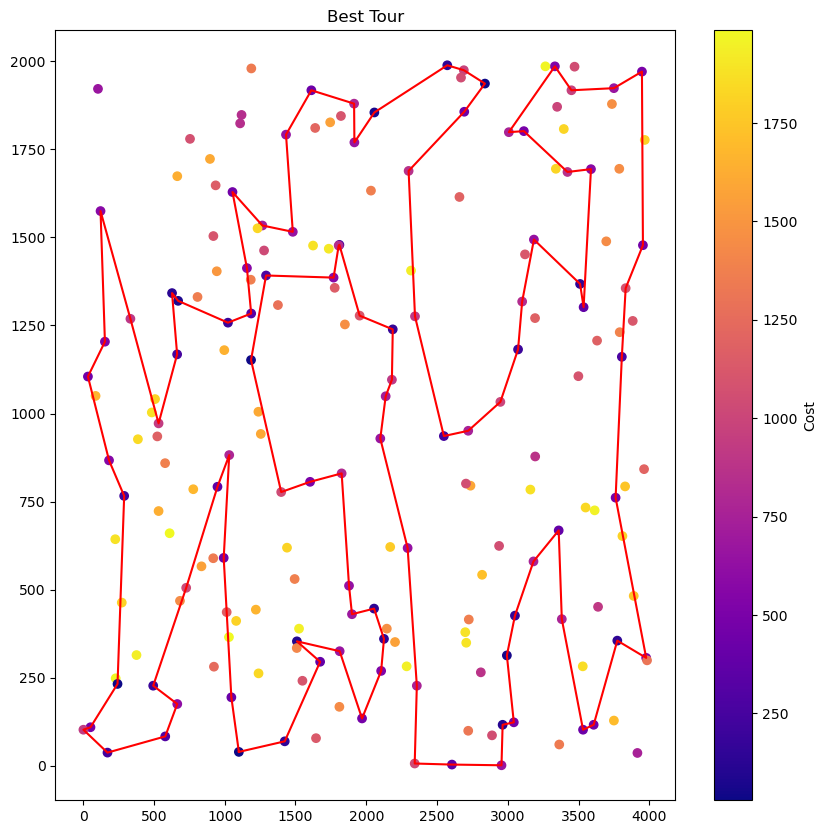

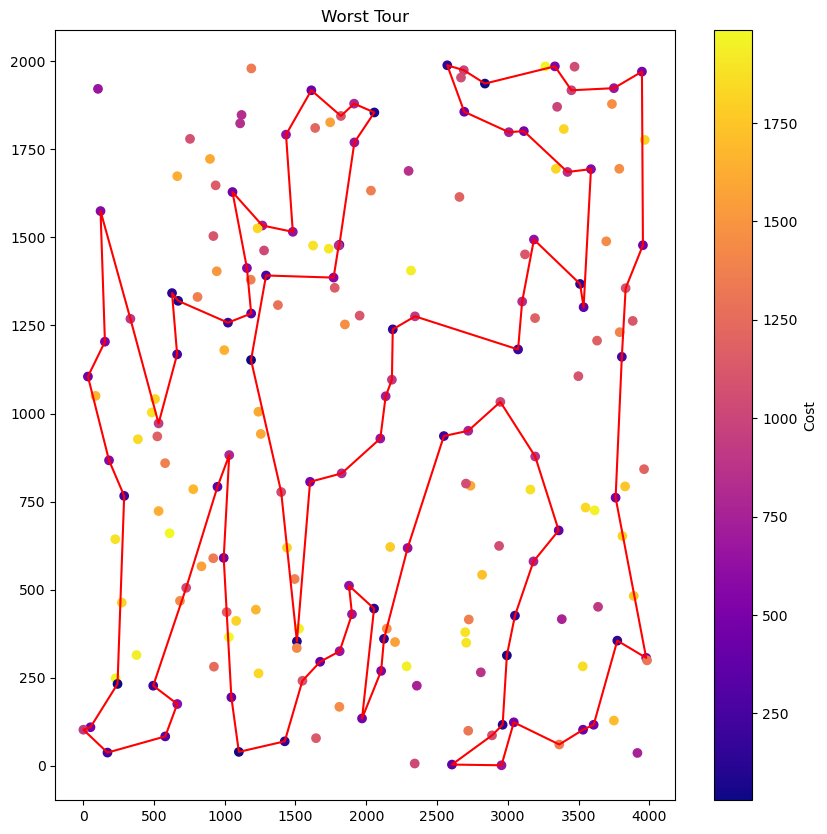

In [2]:
run_steepest_2n_bgch_experiment(filenames['A'])

In [ ]:
# step_search_2n_bgch(filenames['B'])

In [ ]:
# step_search_2n_bgch(filenames['C'])

In [ ]:
# step_search_2n_bgch(filenames['D'])

## Steepest search, two-edges exchange, random start

#### PSEUDOCODE:

```
 TODO
```

In [ ]:
# step_search_2e_r(filenames['A'])

In [ ]:
# step_search_2e_r(filenames['B'])

In [ ]:
# step_search_2e_r(filenames['C'])

In [ ]:
# step_search_2e_r(filenames['D'])

## Steepest search, two-edges exchange, the best greedy construction heuristic

#### PSEUDOCODE:

```
 TODO
```

In [ ]:
# step_search_2e_bgch(filenames['A'])

In [ ]:
# step_search_2e_bgch(filenames['B'])

In [ ]:
# step_search_2e_bgch(filenames['C'])

In [ ]:
# step_search_2e_bgch(filenames['D'])

## Greedy local search, two-nodes exchange, random start

## Greedy local search, two-nodes exchange, the best greedy construction heuristic

## Results

### Objective function values:

| Experiment | Algorithm  | MIN   | MAX   | AVG over 200   |
|-----------|----------|----------|----------|----------|
| A | RANDOM | 241153 | 298242 | 264750.185 |
| A | NEAREST_N  | 84471 | 95013 | 87679.135 |
| A | G_CYCLE  | 76270 | 84172 | 78871.415 |
| A | 2-regret  | 115650 | 116203 | 115926.5 |
| A | **weighted 2-regret**  | 74563 | 79037 | 76445.205 |
|-----------|----------|----------|----------|----------|
| B | RANDOM | 240380 | 296499 | 266304.945 |
| B | NEAREST_N  | 77448 | 82631 | 79282.58 |
| B | G_CYCLE  | 71970 | 80491 | 75752.16 |
| B | 2-regret  | 101374 | 126143 | 115489.285 |
| B | **weighted 2-regret**  | 69453 | 77709 | 71828.865 |
|-----------|----------|----------|----------|----------|
| C | RANDOM | 188548 | 239747 | 214950.675 |
| C | NEAREST_N  | 56304 | 63697 | 58872.68 |
| C | G_CYCLE  | 53614 | 60247 | 56731.47 |
| C | 2-regret  | 64432 | 73978 | 69722.2 |
| C | **weighted 2-regret**  | 53029 | 60243 | 55889.185 |
|-----------|----------|----------|----------|----------|
| D | RANDOM  | 194917 | 246170 | 218555.1 |
| D | NEAREST_N  | 50335 | 59846 | 54290.68 |
| D | G_CYCLE  | 50639 | 60031 | 54900.765 |
| D | 2-regret  | 60313 | 74039 | 68686.81 |
| D | **weighted 2-regret**  | 49165 | 59081 | 53715.845 |

### Running times:

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| step_search_2n_r | a | b | c | d |
| step_search_2n_bgch | a | b | c | d |
| step_search_2e_r | a | b | c | d |
| step_search_2e_bgch | a | b | c | d |
|-----------|----------|----------|----------|----------|
| greedy_search_2n_r | a | b | c | d |
| greedy_search_2n_bgch | a | b | c | d |
| greedy_search_2e_r | a | b | c | d |
| greedy_search_2e_bgch | a | b | c | d |


### CONCLUSIONS:

TODO